Primeras filas del DataFrame:
       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM    2130.0   7.0   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM    1800.0   1.0   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM    1700.0   3.0   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM    2037.0   9.0   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM    1200.0   6.0   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire        784.0       1.0   510.0   
1    Central        182.0       1.0   330.0   
2  Southwest        356.0       1.0   480.0   
3   Van Nuys        964.0       1.0   343.0   
4  Hollywood        666.0       2.0   354.0   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   In

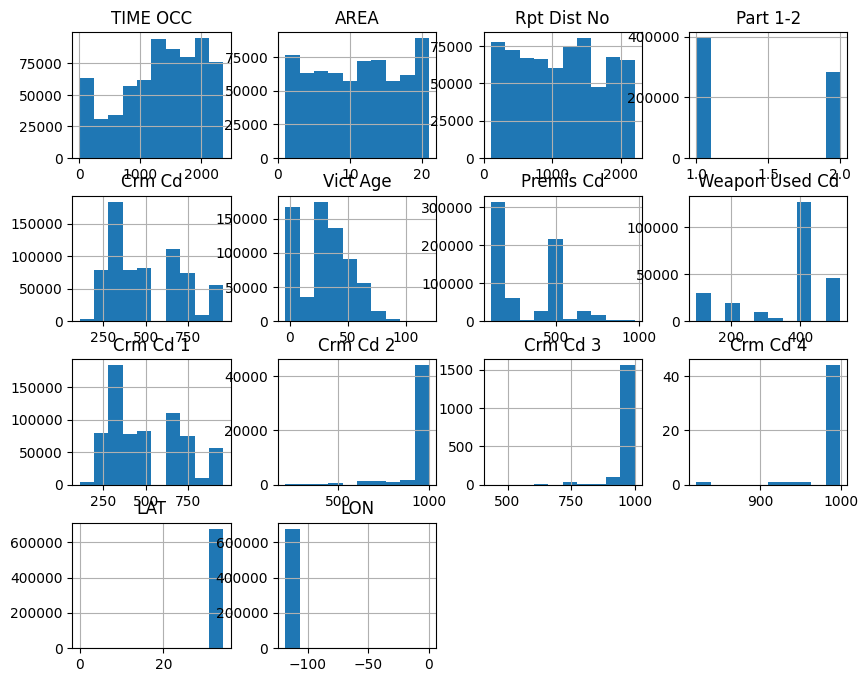


Mapa de calor de la correlación:


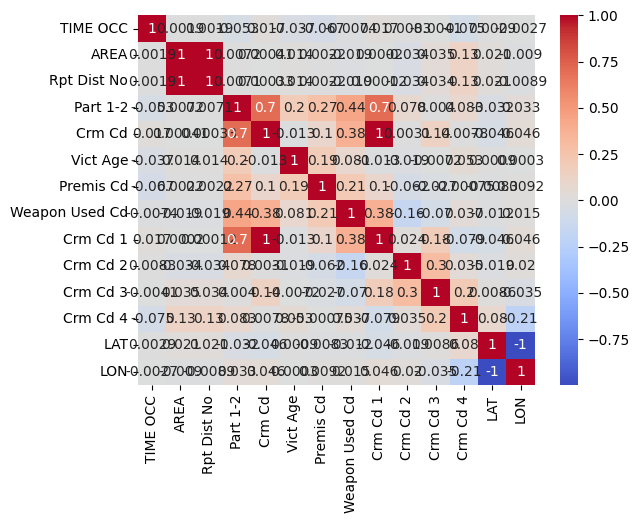

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('angelsdata.csv', low_memory=False)

# Mostrar las primeras filas de los datos
print("Primeras filas del DataFrame:")
print(data.head())

# Descripción estadística de los datos numéricos
print("\nDescripción estadística de los datos numéricos:")
print(data.describe())

# Distribución de características categóricas
# Ajustamos para usar 'Crm Cd Desc', 'Premis Desc' y 'Vict Sex'
categorical_columns = ['Crm Cd Desc', 'Premis Desc', 'Vict Sex']
for col in categorical_columns:
    print(f"\nDistribución de {col}:")
    print(data[col].value_counts())

# Histograma de las características numéricas
print("\nHistogramas de características numéricas:")
data.hist(figsize=(10, 8))
plt.show()

# Mapa de calor de la correlación
# Seleccionar solo columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación y graficar
print("\nMapa de calor de la correlación:")
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Crear el modelo de KNN con k=1 (dado el tamaño pequeño de los datos)
knn = KNeighborsClassifier(n_neighbors=1)

# Realizar validación cruzada
scores = cross_val_score(knn, X_scaled, y_status, cv=2, scoring='f1_weighted')  # Cambia 'cv' según el tamaño de tus datos

# Imprimir el puntaje promedio de F1
print("F1 Score promedio con K-Nearest Neighbors:", scores.mean())


F1 Score promedio con K-Nearest Neighbors: 0.08333333333333333


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Objetivos de regresión: Latitud y Longitud
y_latitude = data_cleaned['LAT']
y_longitude = data_cleaned['LON']

# Dividir los datos para el modelo de regresión de Latitud
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X_scaled, y_latitude, test_size=0.2, random_state=42)

# Modelo de regresión para Latitud
reg_latitude = RandomForestRegressor(random_state=42)
reg_latitude.fit(X_train_lat, y_train_lat)
y_pred_lat = reg_latitude.predict(X_test_lat)

# Evaluación del modelo de Latitud
print("Resultados de regresión para LAT:")
print("Mean Absolute Error (MAE) Latitud:", mean_absolute_error(y_test_lat, y_pred_lat))
print("Mean Squared Error (MSE) Latitud:", mean_squared_error(y_test_lat, y_pred_lat))

# Dividir los datos para el modelo de regresión de Longitud
X_train_long, X_test_long, y_train_long, y_test_long = train_test_split(X_scaled, y_longitude, test_size=0.2, random_state=42)

# Modelo de regresión para Longitud
reg_longitude = RandomForestRegressor(random_state=42)
reg_longitude.fit(X_train_long, y_train_long)
y_pred_long = reg_longitude.predict(X_test_long)

# Evaluación del modelo de Longitud
print("\nResultados de regresión para LON:")
print("Mean Absolute Error (MAE) Longitud:", mean_absolute_error(y_test_long, y_pred_long))
print("Mean Squared Error (MSE) Longitud:", mean_squared_error(y_test_long, y_pred_long))


Resultados de regresión para LAT:
Mean Absolute Error (MAE) Latitud: 0.09416849999996657
Mean Squared Error (MSE) Latitud: 0.01668942843249196

Resultados de regresión para LON:
Mean Absolute Error (MAE) Longitud: 0.029836000000010188
Mean Squared Error (MSE) Longitud: 0.0009046725320005334


/tmp/ipykernel_6712/2186329412.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['DATE OCC'] = pd.to_datetime(data_cleaned['DATE OCC'], errors='coerce')


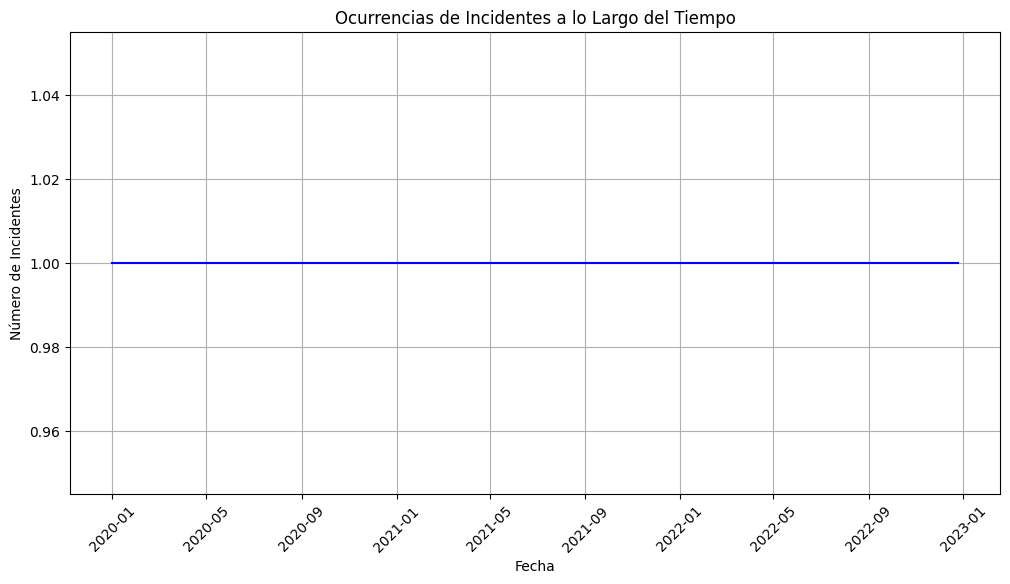

In [23]:
import matplotlib.pyplot as plt

# Asegurarse de que la columna de fecha esté en el formato datetime
data_cleaned['DATE OCC'] = pd.to_datetime(data_cleaned['DATE OCC'], errors='coerce')

# Agrupar datos por fecha y contar ocurrencias de incidentes por día
time_series = data_cleaned.groupby(data_cleaned['DATE OCC'].dt.date).size()

# Graficar la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(time_series, color='blue')
plt.title("Ocurrencias de Incidentes a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de Incidentes")
plt.xticks(rotation=45)
plt.grid()
plt.show()


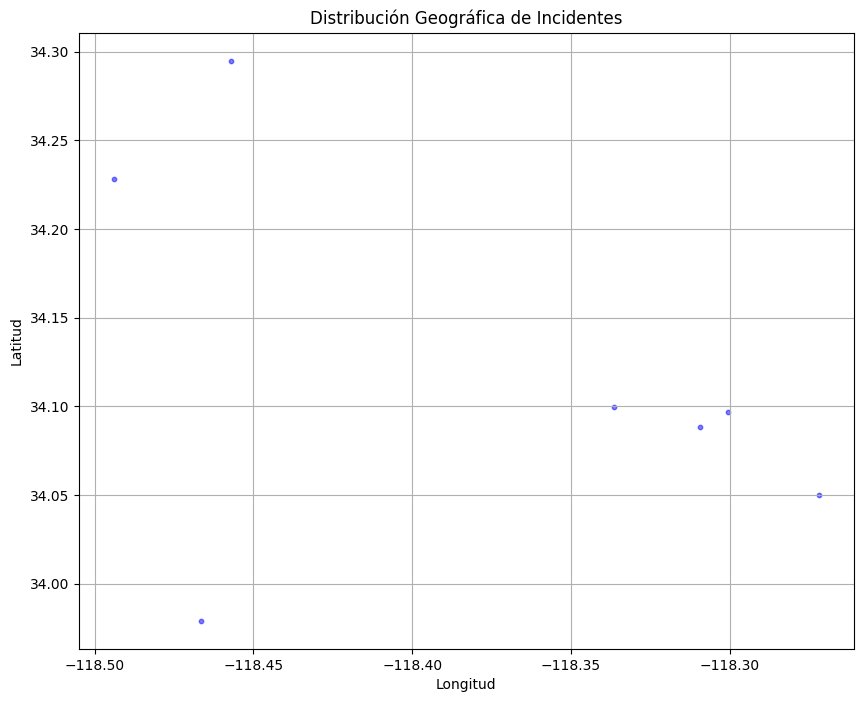

In [24]:
# Filtrar los datos para asegurarnos de que solo tenemos ubicaciones válidas
data_cleaned = data_cleaned[(data_cleaned['LAT'] != 0) & (data_cleaned['LON'] != 0)]

# Crear un gráfico de dispersión para visualizar la distribución geográfica
plt.figure(figsize=(10, 8))
plt.scatter(data_cleaned['LON'], data_cleaned['LAT'], alpha=0.5, s=10, c='blue')
plt.title("Distribución Geográfica de Incidentes")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


Ejemplos de anomalías detectadas:
            LAT      LON  TIME OCC  Anomaly
372378  34.0503 -118.272     230.0       -1


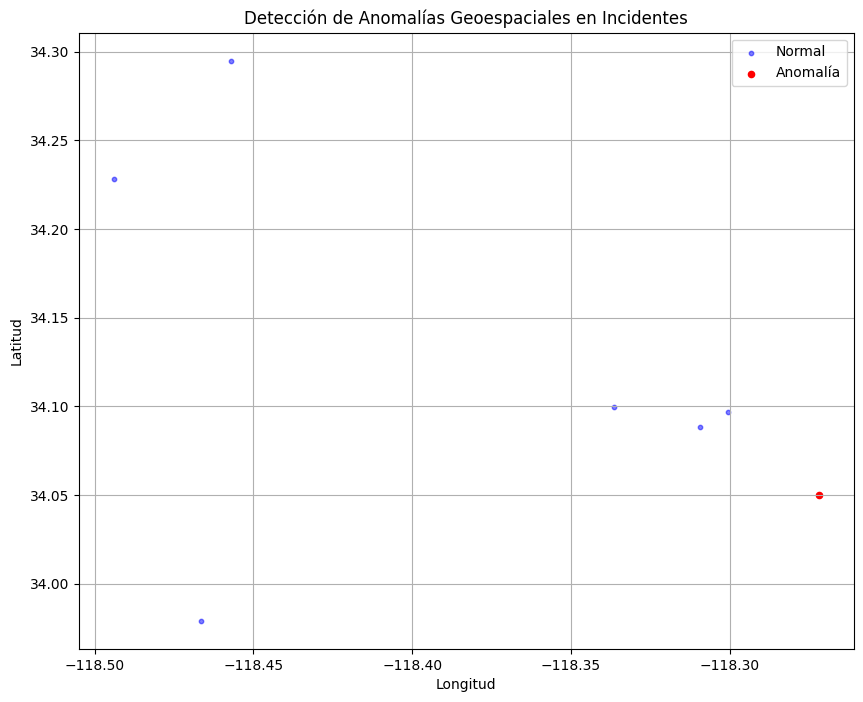

In [25]:
from sklearn.ensemble import IsolationForest

# Seleccionar características para la detección de anomalías: Latitud, Longitud y Hora del Incidente
anomaly_features = data_cleaned[['LAT', 'LON', 'TIME OCC']]

# Entrenar el modelo Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)  # 'contamination' indica el porcentaje de anomalías
anomaly_labels = isolation_forest.fit_predict(anomaly_features)

# Agregar los resultados al DataFrame
data_cleaned['Anomaly'] = anomaly_labels

# Filtrar anomalías detectadas
anomalies = data_cleaned[data_cleaned['Anomaly'] == -1]

# Mostrar algunas de las anomalías
print("Ejemplos de anomalías detectadas:")
print(anomalies[['LAT', 'LON', 'TIME OCC', 'Anomaly']].head())

# Visualizar anomalías en un gráfico de dispersión geoespacial
plt.figure(figsize=(10, 8))
plt.scatter(data_cleaned['LON'], data_cleaned['LAT'], alpha=0.5, s=10, c='blue', label='Normal')
plt.scatter(anomalies['LON'], anomalies['LAT'], color='red', s=20, label='Anomalía')
plt.title("Detección de Anomalías Geoespaciales en Incidentes")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()
plt.grid(True)
plt.show()


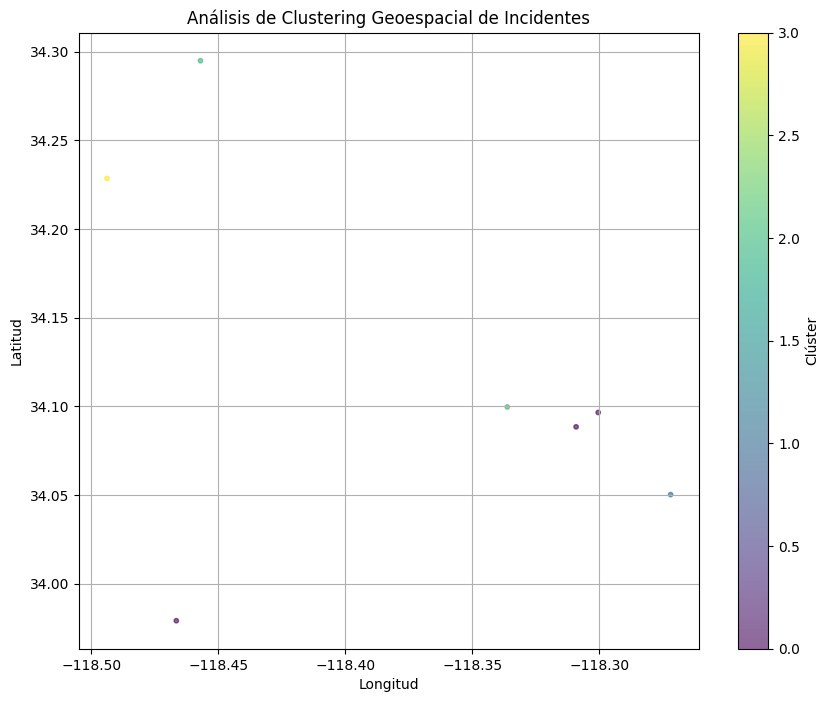

In [26]:
from sklearn.cluster import KMeans
import numpy as np

# Seleccionar las características para el clustering: Latitud, Longitud y Hora del Incidente
clustering_features = data_cleaned[['LAT', 'LON', 'TIME OCC']]

# Determinar el número de clústeres (k) - en este caso, seleccionamos 4 como ejemplo
kmeans = KMeans(n_clusters=4, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(clustering_features)

# Visualización de los clústeres en un gráfico geoespacial
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_cleaned['LON'], data_cleaned['LAT'], c=data_cleaned['Cluster'], cmap='viridis', s=10, alpha=0.6)
plt.colorbar(scatter, label='Clúster')
plt.title("Análisis de Clustering Geoespacial de Incidentes")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


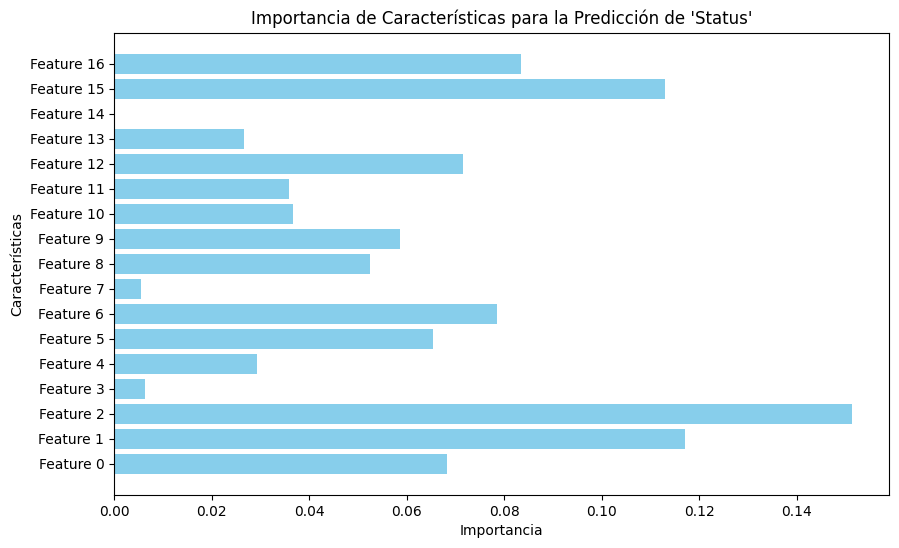

In [29]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Entrenar un modelo de Random Forest en el conjunto completo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_scaled, y_status)

# Extraer las importancias de características y nombres directamente de X_scaled
importances = clf.feature_importances_
feature_names = [f"Feature {i}" for i in range(X_scaled.shape[1])]  # Crear nombres genéricos si no hay nombres específicos

# Crear un gráfico de barras para las importancias de características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title("Importancia de Características para la Predicción de 'Status'")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Configurar el GridSearchCV con cv=2
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=2,
    n_jobs=-1
)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_scaled, y_status)

# Mostrar los mejores hiperparámetros y el puntaje asociado
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntaje F1 (ponderado):", grid_search.best_score_)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntaje F1 (ponderado): 0.25


In [33]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Evaluación del modelo optimizado en el conjunto de prueba
from sklearn.metrics import classification_report

y_pred = optimized_clf.predict(X_test)

# Generar el informe de clasificación con zero_division para evitar advertencias
print("Informe de Clasificación del Modelo Optimizado:")
print(classification_report(y_test, y_pred, zero_division=0))



Informe de Clasificación del Modelo Optimizado:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



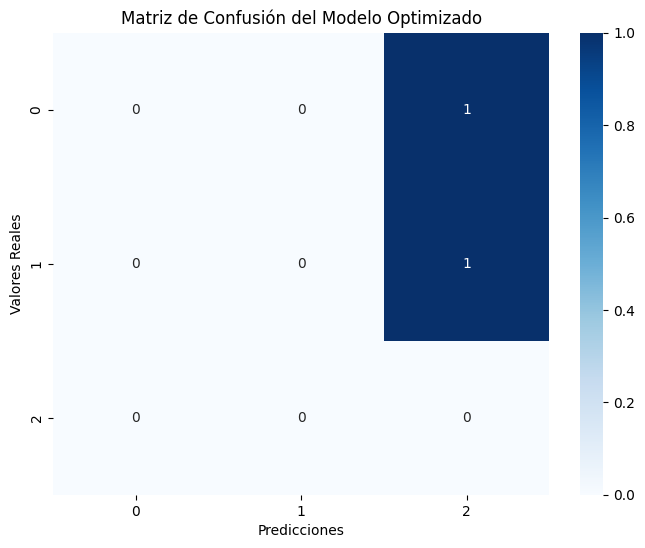

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar predicciones en el conjunto de prueba
y_pred = optimized_clf.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_status), yticklabels=np.unique(y_status))
plt.title("Matriz de Confusión del Modelo Optimizado")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()


/home/user/jupyter_mineria/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


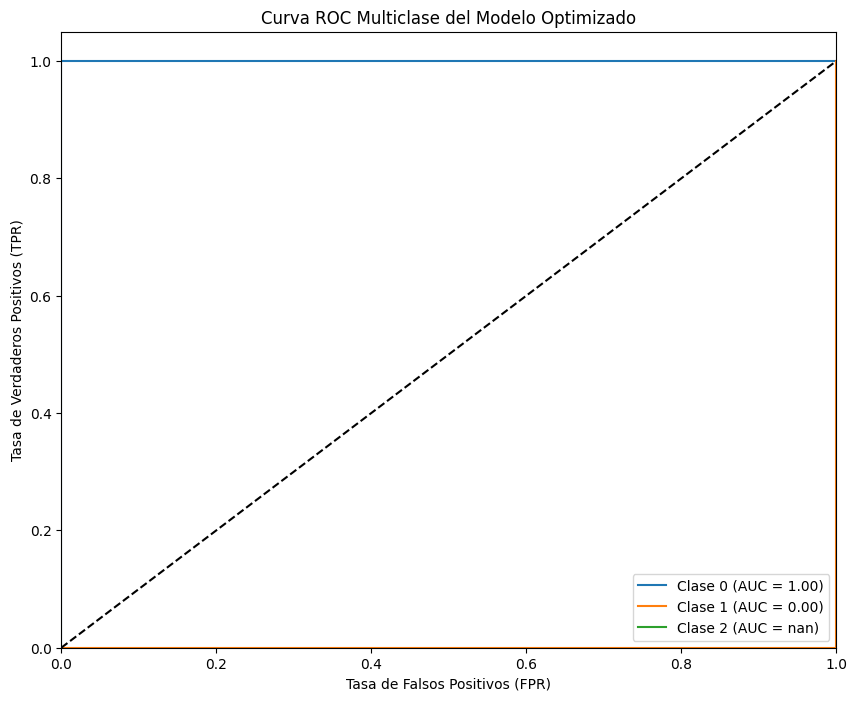

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarizar las etiquetas para el análisis multiclase
y_test_binarized = label_binarize(y_test, classes=np.unique(y_status))
y_pred_proba = optimized_clf.predict_proba(X_test)

# Graficar la curva ROC para cada clase
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(np.unique(y_status)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Clase {class_label} (AUC = {roc_auc:.2f})")

# Configuración de la gráfica
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC Multiclase del Modelo Optimizado")
plt.legend(loc="lower right")
plt.show()


In [40]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


# Calcular métricas con zero_division ajustado
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)

# Mostrar resultados finales
print("Resumen de Métricas del Modelo Optimizado:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print(f"F1 Score (ponderado): {f1:.2f}")
print(f"Recall (ponderado): {recall:.2f}")
print(f"Precisión (ponderada): {precision:.2f}")


Resumen de Métricas del Modelo Optimizado:
Precisión (Accuracy): 0.00
F1 Score (ponderado): 0.00
Recall (ponderado): 0.00
Precisión (ponderada): 1.00


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Paso 1: Selecciono las columnas de texto que quiero vectorizar
# Aquí trabajo con 'PRIMARY DESCRIPTION', que contiene información textual relevante.
X_text = data_cleaned['PRIMARY DESCRIPTION']
y_arrest = data_cleaned['ARREST']  # Variable objetivo para predecir si hubo arresto

# Paso 2: Transformo el texto en vectores de características
# Uso CountVectorizer para convertir el texto en una matriz de conteo de palabras.
vectorizer = CountVectorizer()
X_text_vectorized = vectorizer.fit_transform(X_text)

# Paso 3: Divido los datos vectorizados en conjuntos de entrenamiento y prueba
X_text_train, X_text_test, y_arrest_train, y_arrest_test = train_test_split(X_text_vectorized, y_arrest, test_size=0.2, random_state=42)

# Paso 4: Entreno el modelo Naive Bayes
# Utilizo MultinomialNB, que es adecuado para conteos de palabras.
nb_model = MultinomialNB()
nb_model.fit(X_text_train, y_arrest_train)

# Paso 5: Realizo predicciones y evaluo el modelo
y_pred = nb_model.predict(X_text_test)
print("Clasificación con Naive Bayes en Minería de Texto (PRIMARY DESCRIPTION):")
print(classification_report(y_arrest_test, y_pred))

# Paso 6: Repito el proceso para 'SECONDARY DESCRIPTION' si está disponible
# Esta parte es opcional y depende de la existencia de datos en 'SECONDARY DESCRIPTION'.
if 'SECONDARY DESCRIPTION' in data_cleaned.columns:
    X_secondary_text = data_cleaned['SECONDARY DESCRIPTION']
    X_secondary_vectorized = vectorizer.fit_transform(X_secondary_text)
    X_secondary_train, X_secondary_test, y_arrest_train, y_arrest_test = train_test_split(X_secondary_vectorized, y_arrest, test_size=0.2, random_state=42)

    # Entreno y evalúo el modelo en 'SECONDARY DESCRIPTION'
    nb_model.fit(X_secondary_train, y_arrest_train)
    y_pred_secondary = nb_model.predict(X_secondary_test)
    print("Clasificación con Naive Bayes en Minería de Texto (SECONDARY DESCRIPTION):")
    print(classification_report(y_arrest_test, y_pred_secondary))


KeyError: 'PRIMARY DESCRIPTION'

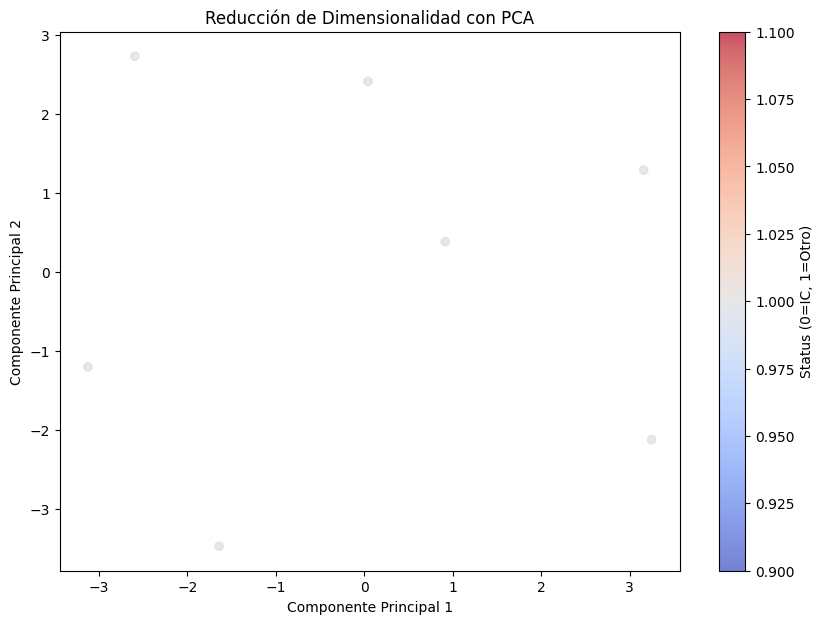

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Paso 1: Configuro PCA para reducir los datos a 2 componentes principales
pca = PCA(n_components=2)

# Paso 2: Aplico PCA a los datos escalados
X_pca = pca.fit_transform(X_scaled)

# Paso 3: Creo una columna binaria a partir de 'Status' para visualización
# Esto asignará 0 si 'Status' es 'IC' y 1 para cualquier otro valor.
# Ajusta el criterio de acuerdo con los valores que tienes en 'Status'.
color_data = data_cleaned['Status'].apply(lambda x: 0 if x == 'IC' else 1)

# Paso 4: Visualizo los datos en el espacio reducido
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color_data, cmap='coolwarm', alpha=0.7)
plt.title('Reducción de Dimensionalidad con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Status (0=IC, 1=Otro)')
plt.show()



In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Paso 1: Defino la variable objetivo usando 'Status' en lugar de 'ARREST'
y_status = data_cleaned['Status']  # Usando 'Status' como objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_status_train, y_status_test = train_test_split(X_scaled, y_status, test_size=0.2, random_state=42)

# Paso 2: Definir el modelo base
clf = RandomForestClassifier(random_state=42)

# Paso 3: Definir el conjunto de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Paso 4: Configurar GridSearchCV con el modelo y los hiperparámetros
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_status_train)

# Paso 5: Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Paso 6: Evaluar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Reporte de Clasificación del Mejor Modelo:")
print(classification_report(y_status_test, y_pred))


ValueError: 
All the 180 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/home/user/jupyter_mineria/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/user/jupyter_mineria/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user/jupyter_mineria/lib/python3.12/site-packages/sklearn/ensemble/_forest.py", line 421, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user/jupyter_mineria/lib/python3.12/site-packages/sklearn/ensemble/_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
  File "/home/user/jupyter_mineria/lib/python3.12/site-packages/sklearn/utils/multiclass.py", line 219, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [58]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Preprocesar los datos para Prophet
# Asegúrate de que el DataFrame tiene las columnas necesarias.
# Prophet requiere una columna de fecha 'ds' y una columna de valores 'y' para hacer pronósticos.
data_cleaned['DATE OCC'] = pd.to_datetime(data_cleaned['DATE OCC'], errors='coerce')
data_prophet = data_cleaned.groupby(data_cleaned['DATE OCC'].dt.date).size().reset_index(name='y')
data_prophet.columns = ['ds', 'y']  # Prophet necesita estas etiquetas exactas

# Paso 2: Crear y entrenar el modelo Prophet
model = Prophet()
model.fit(data_prophet)

# Paso 3: Hacer un DataFrame para fechas futuras en las que queremos predecir
future = model.make_future_dataframe(periods=30)  # Pronosticar 30 días adicionales

# Paso 4: Realizar el pronóstico
forecast = model.predict(future)

# Paso 5: Visualizar el pronóstico
fig1 = model.plot(forecast)
plt.title("Pronóstico de Series Temporales de Casos")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.show()

# Paso 6: Visualización de Componentes del Pronóstico (opcional)
fig2 = model.plot_components(forecast)
plt.show()


ModuleNotFoundError: No module named 'prophet'